<a href="https://colab.research.google.com/github/sudipta-on/Qiskit_Fall_Fest_2024/blob/main/Hackathon/QFF_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 $$ \textbf{QISKIT Fall Fest, 2024}$$

$\text{Hackathon Problem: }$
$$ \textbf{Quantum Random Number Generator} $$

> **Problem Statement:** Your task is to create a random number generating circuit. You can decide on the number of qubits and possible outcomes, we’ll call this number n. Keep in mind that creating a superposition chain of more
than 10 qubits can be quite tricky.
>
>Utilizing H-gates, generate a quantum state with n number of equally possible outcomes. How many
qubits are needed for this task? It may be helpful to think about how the quantum computational
space scales with each additional qubit. Assign your numeric values to the possible states, so that the
measured state of the qubits results in your program printing the associated value.

## $\text{Problem Soliving Approach}$

As Hadamard gate creates a uniform superpositions of quantum bit states $|0\rangle$ and $|1\rangle$ which is also known as **Qubits**.
$$ H |0⟩ = \frac{1}{\sqrt{2}}(|0⟩+|1⟩) $$
And while taking measurement over the qubit (on which Hadamard gate is applied) it gives $|0\rangle$ and $|1\rangle$ states with equal probability ($ P =\frac{1}{2} $). Using this basic concept of Hadamard gate we planned to generate random number.

So, When Hadamard gate applied to multiple qubits, each qubit gets placed into an equal superposition of |0⟩ and |1⟩, and the total state is the tensor product of these individual qubits' states.
$$ H^{\otimes n} |0⟩^{\otimes n} → \frac{1}{\sqrt{2^n}}\sum_i^{2^n-1}|i⟩$$
This superpositions state have $2^n$ possibilities with equal probabilities.

So, while taking measurements we will found random states. Using this random state bits we can generate our required Random Numberby converting it to decimal.

That's it, we have generated random number using Quantum bits and Quantum Computation.

Now, lets solve this step-wise with implementing in codes...


Before we start we have to insatll required packages to run the code in real quantum computer.

In [1]:
# installing required packages
%pip install qiskit[visualization] --quiet
%pip install qiskit_ibm_runtime --quiet
%pip install qiskit_aer --quiet
%pip install qiskit-transpiler-service --quiet

Now lets import the packages/modules

In [2]:
## Import the required packages
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeTorino

import matplotlib.pyplot as plt
import numpy as np
import math
import sys
import time

In [3]:
### Save API Token, if needed

%set_env QXToken=3538c7acbe9df8596e90a098c6ddab574b4a74393ae63e58a6daa2aa59235ee29f18d76443d8ce07bc8a9c154ce844ce1cabc55d8677fec00fb56652963e5d11

# Make sure there is no space between the equal sign
# and the beginning of your token

env: QXToken=3538c7acbe9df8596e90a098c6ddab574b4a74393ae63e58a6daa2aa59235ee29f18d76443d8ce07bc8a9c154ce844ce1cabc55d8677fec00fb56652963e5d11


## $\text{1. Quantum Circuit Implementation}$
In this section we will go with $n$ = 100 qubits and implement a quantum circuit which will have $2^n$ equally probable possibilities.

For this we have to apply Hadamard gate to each qubit, and after that we have to take measurements.

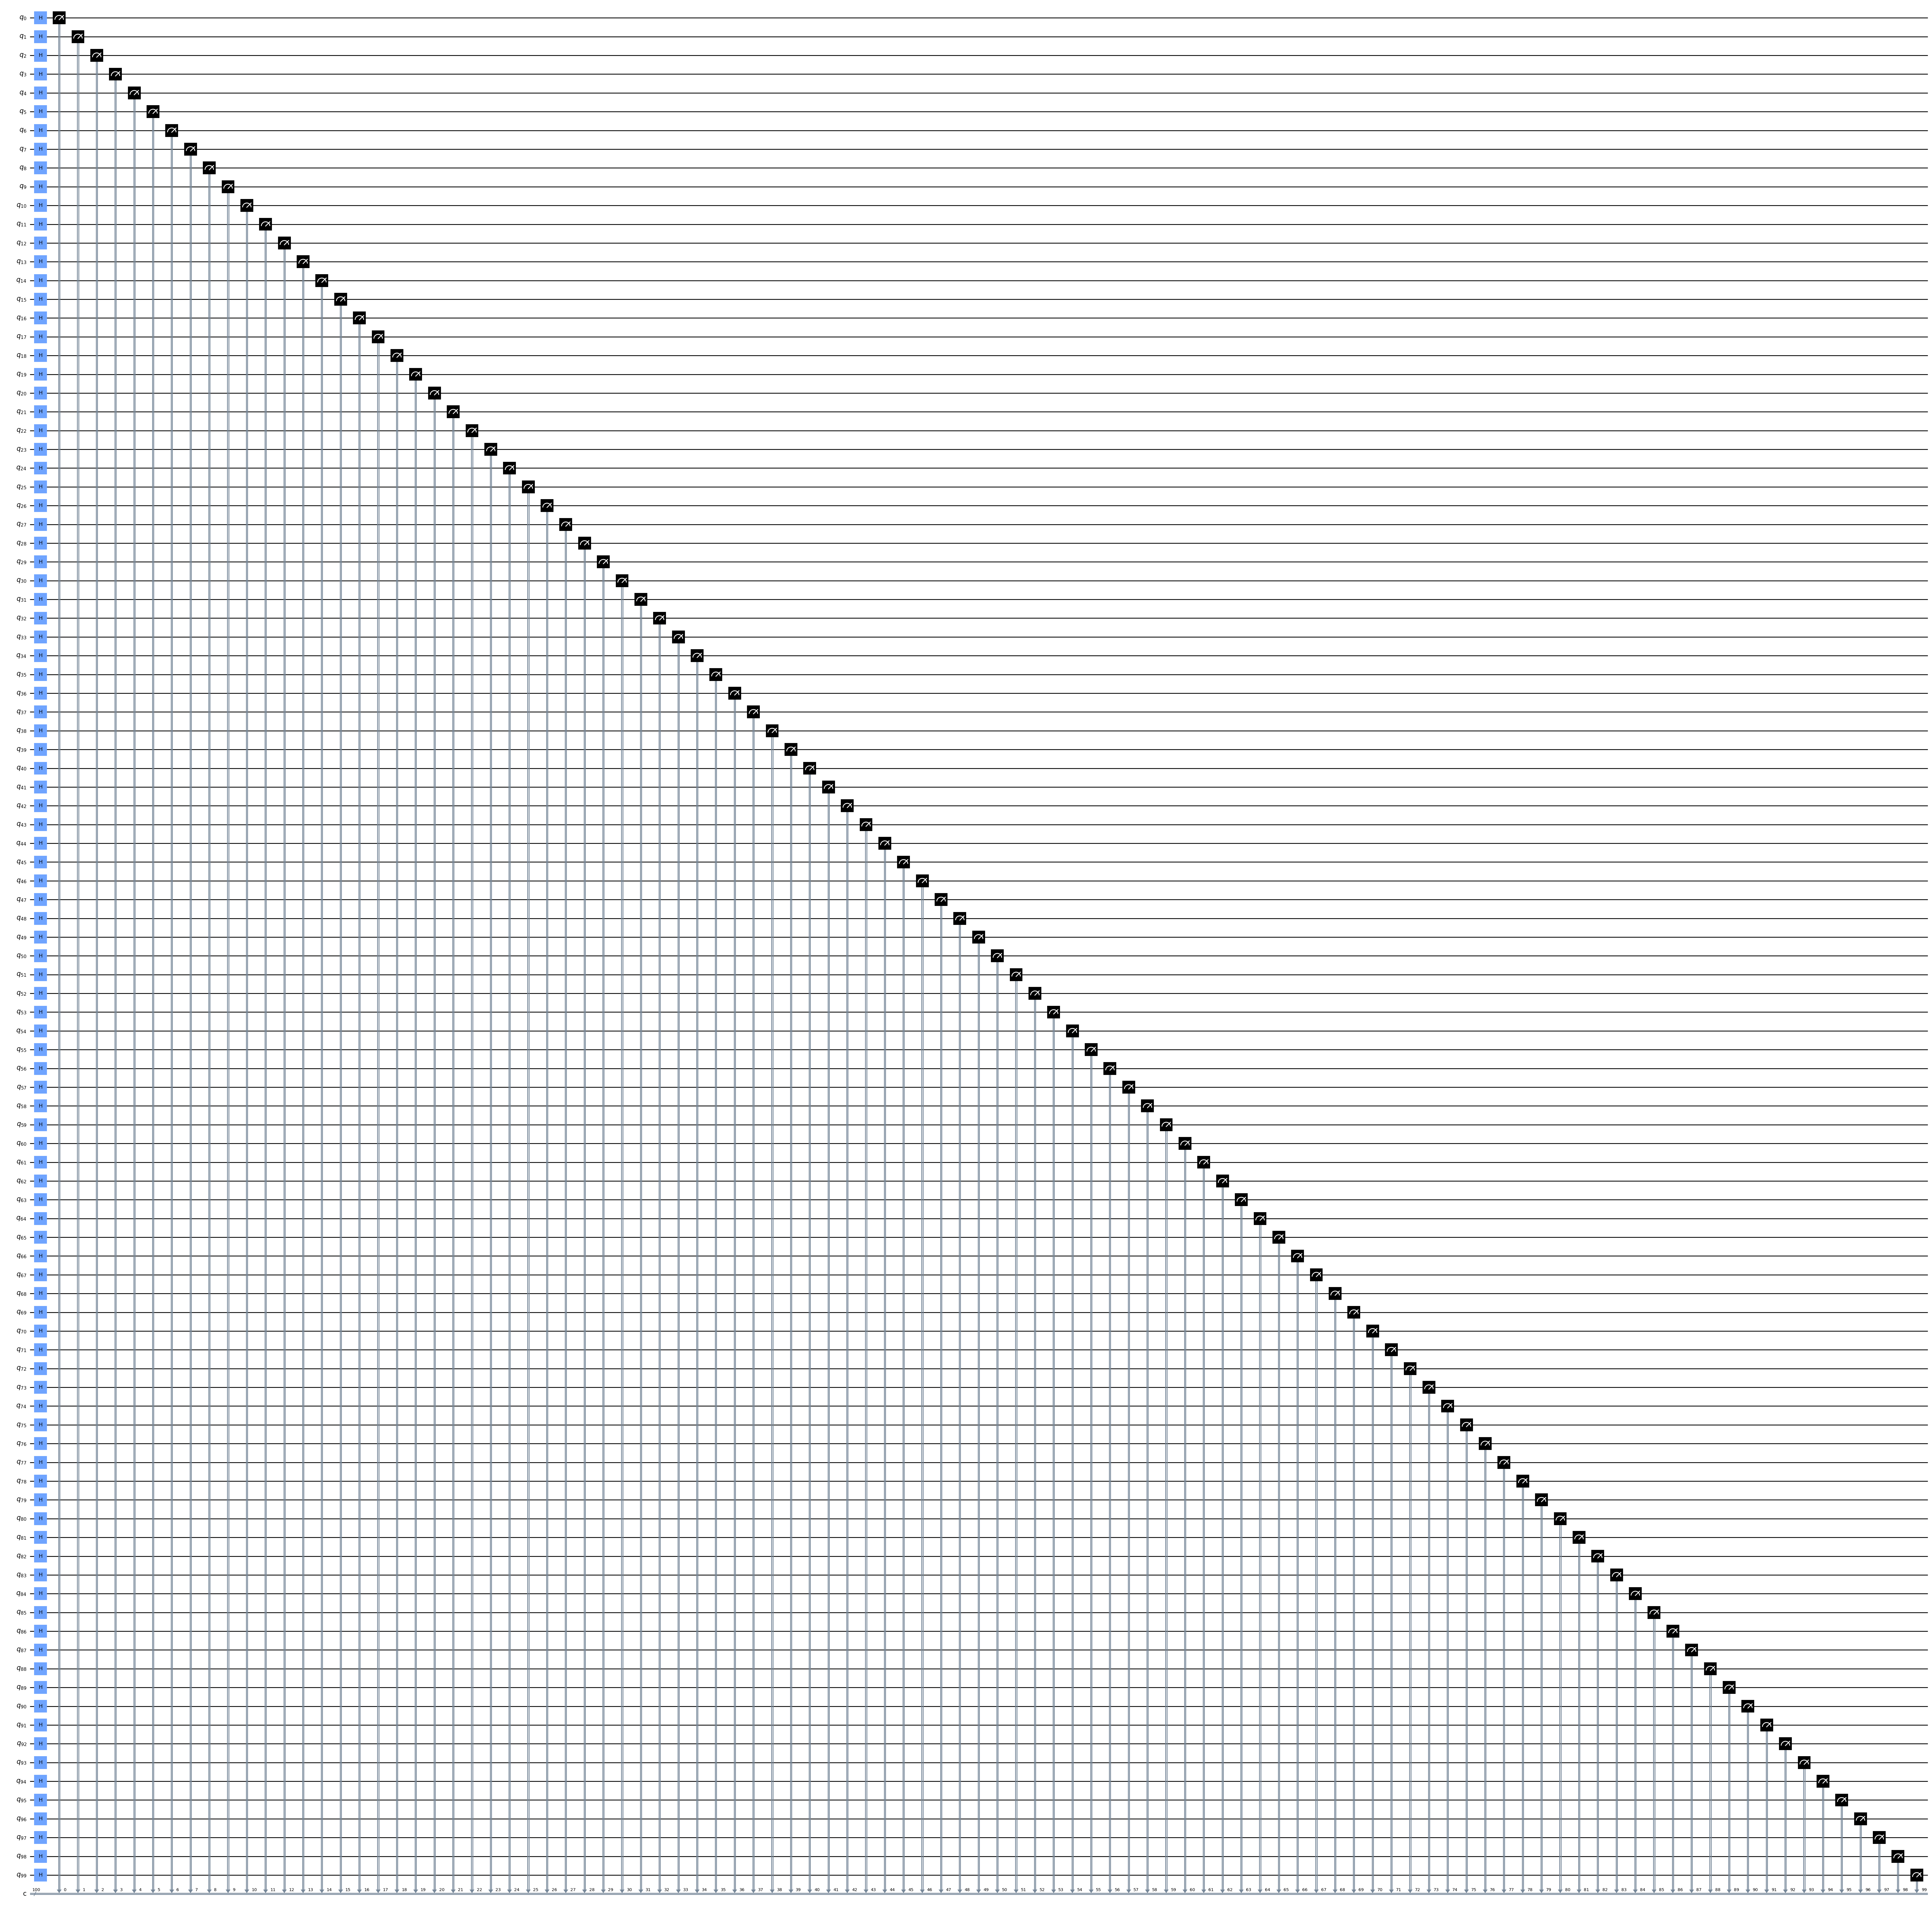

In [4]:
n = 100 # Number of qubits
shots = 10000 # Number of shots to get the distribution

# Create quantum circuit with n qubits
qc = QuantumCircuit(n,n)

# Apply Hadamard gate to wach qubit to create superposition
qc.h(range(n))

# Measure all qubits
qc.measure(range(n),range(n))

# Circuit Visualization
qc.draw('mpl', style='clifford', fold = 120)

> One can also use smaller $n$ values to simiplify the problem.

## $\text{2.  Using }$ `AerSimulator()`
Once the superposition is created, we have to measure the qubits. The measurement collapses the state to one of the possible outcomes (with equal probability if all qubits are in a superposition). Running the circuit multiple times (i.e., using a higher number of shots) will give a distribution where each outcome has an equal chance of occurring, demonstrating quantum randomness.

For measurement, we use `AerSimulator` here. Using this simulator we prepare a sample where all individual states are equally probable.

In [5]:
# making a simulator object
backend = AerSimulator()

sampler = Sampler(backend)

In [6]:
# run the experiment
job = sampler.run([qc],shots = shots)

# get the results
result = job.result()[0]
# interpret the results as a "counts" dictionary
counts_sampler = result.data.c.get_counts()
print(counts_sampler)

{'0011111000110100100110011000111111011010110111000111101110101111010011001111100011111101101101111001': 1, '0110100101110101110101011110001010110001100011001000010101010010110001000001111100010000000110100011': 1, '1111011011111011101000100011111110011111011100001100100100011101100000011010010111100011011100011001': 1, '0110010010110000110011000100110101110011000100001100001100100010101000110011110011000111001000000110': 1, '1110010100010110101011101000011101101010111000110011001011100100110001010010000110000110001111110001': 1, '1001111010111110000100100000100011001010011010101110101100001011000010111100000011000111011100001110': 1, '1110001111011000011100110100110100011111110001010011101110100110011110101000000111001110110110100001': 1, '1100000001101111010000100101100000011000001110001001011000010100100111100001001110011001000011011110': 1, '0100101001111001110100011100010011011111110100111010110110101110100000101100101100111101110010001000': 1, '01101011111000110011101001010000000

In [7]:
random_bitstring = list(counts_sampler.keys())[0] # to access the first quantum state
random_number = int(random_bitstring, 2)  # Binary to decimal conversion
print("The random number generated using the Quantum Circuit is : ", random_number)

The random number generated using the Quantum Circuit is :  308026558836324040995043793785


Now lets combine the codes in form a function

In [8]:
def Random_N(n):
  '''
  Generates Random Number using Quantum Circuit

  @parameters
  n : number of qubits used
  '''
  shots = 10000 # Number of shots to get the distribution

  # Create quantum circuit with n qubits
  qc = QuantumCircuit(n,n)
  qc.h(range(n))
  qc.measure(range(n),range(n))
  # measurement
  backend = AerSimulator()
  sampler = Sampler(backend)
  job = sampler.run([qc],shots = shots)
  result = job.result()[0]
  counts_sampler = result.data.c.get_counts()
  random_numbers = int(list(counts_sampler)[0], 2)  # Binary to decimal conversion
  return random_numbers

random_number = Random_N(n)
print("The random number generated using the Quantum Circuit is : ", random_number)

The random number generated using the Quantum Circuit is :  763804340257965626578925537476


In [9]:
## For n random numbers generation
N = 5
for i in range(N):
  print(Random_N(10))

lst = [Random_N(10) for i in range(N)] # lst with N random numbers
print(lst)

864
298
473
718
158
[532, 805, 439, 184, 776]


## $\text{3. Using FackProvider}$


In [10]:
n = 10 # Number of qubits
shots = 10000 # Number of shots to get the distribution

# Create quantum circuit with n qubits
qc = QuantumCircuit(n,n)

# Apply Hadamard gate to wach qubit to create superposition
qc.h(range(n))

# Measure all qubits
qc.measure(range(n),range(n))

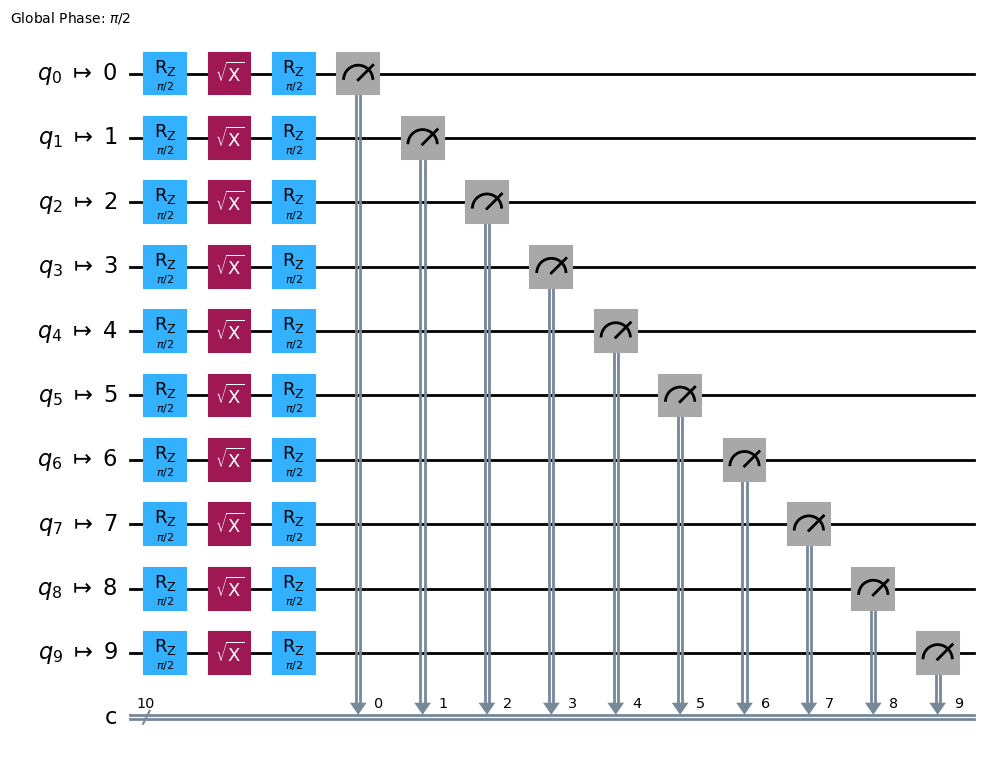

In [11]:
## Convert our circuit down to necessary basis gates for the backend you just selected
backend = FakeTorino()

pm = generate_preset_pass_manager(backend=backend, optimization_level=0)

qc_isa_circuit = pm.run(qc)
qc_isa_circuit.draw(output="mpl", idle_wires=False, style="iqp", fold = 120)

In [12]:
# make a new Sampler object
sampler = Sampler(backend)
# run the experiment
job = sampler.run([qc_isa_circuit])

In [13]:
# get the results
result = job.result()[0]

# interpret the results as a "counts" dictionary
counts_sampler_fake = result.data.c.get_counts()

In [14]:
random_bitstring = list(counts_sampler_fake.keys())[0] # to access the first quantum state
random_number = int(random_bitstring, 2)  # Binary to decimal conversion
print("The random number generated using the Quantum Circuit is : ", random_number)

The random number generated using the Quantum Circuit is :  689


In [15]:
def Random_N(n):
  '''
  Generates Random Number using Quantum Circuit

  @parameters
  n : number of qubits used
  '''
  shots = 10000 # Number of shots to get the distribution

  # Create quantum circuit with n qubits
  qc = QuantumCircuit(n,n)
  qc.h(range(n))
  qc.measure(range(n),range(n))
  # measurement
  backend = FakeTorino()
  pm = generate_preset_pass_manager(backend=backend, optimization_level=0)
  qc_isa_circuit = pm.run(qc)
  sampler = Sampler(backend)
  job = sampler.run([qc_isa_circuit],shots = shots)
  result = job.result()[0]
  counts_sampler = result.data.c.get_counts()
  random_numbers = int(list(counts_sampler)[0], 2)  # Binary to decimal conversion
  return random_numbers

random_number = Random_N(n)
print("The random number generated using the Quantum Circuit is : ", random_number)

The random number generated using the Quantum Circuit is :  862


## $\text{4. On Real Quantum Computer}$

In [16]:
## Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(

    channel="ibm_quantum",

    token="3538c7acbe9df8596e90a098c6ddab574b4a74393ae63e58a6daa2aa59235ee29f18d76443d8ce07bc8a9c154ce844ce1cabc55d8677fec00fb56652963e5d11",

    set_as_default=True,

    overwrite=True,
)

In [17]:
## To run on hardware, select the backend with the fewest number of jobs in the queue
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
backend.name

'ibm_brisbane'

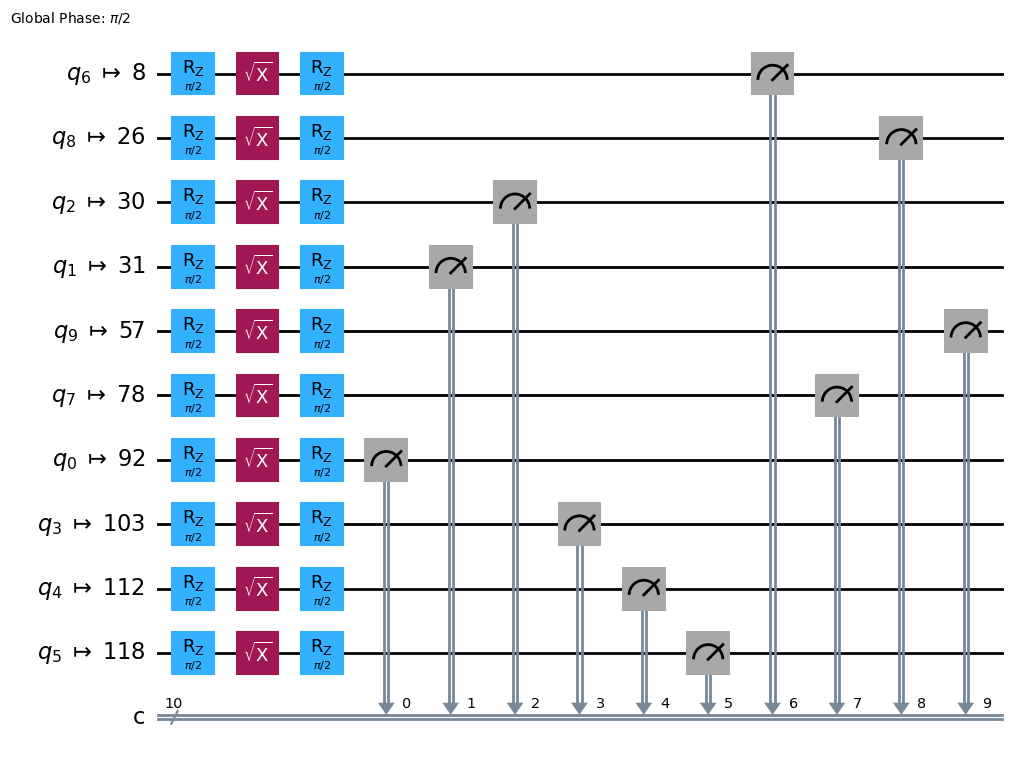

In [18]:
## Convert our circuit down to necessary basis gates for the backend you just selected
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qc_isa_circuit = pm.run(qc)
qc_isa_circuit.draw(output="mpl", idle_wires=False, style="iqp")

In [19]:
# make a new Sampler object
sampler = Sampler(backend)
# run the experiment
job = sampler.run([qc_isa_circuit])

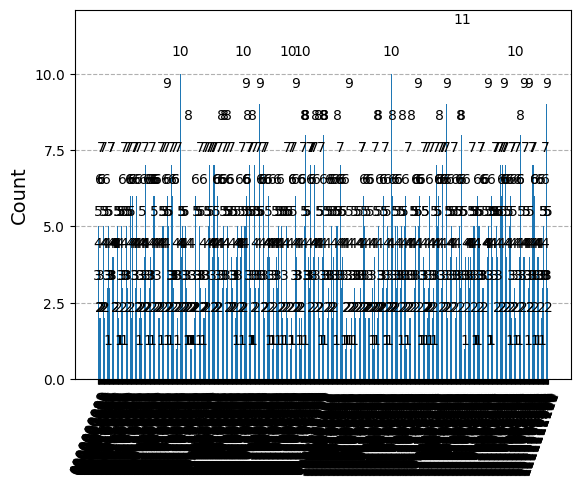

In [20]:
# get the results
result = job.result()[0]

# interpret the results as a "counts" dictionary
counts_sampler = result.data.c.get_counts()

# plotting histogram
plot_histogram(counts_sampler)

So, We have implement code with our input n i.e. number of qubits. For which we get random numbers not in our control. For this there is adaption I used.

For range $[a,b]$ we need $n$, the number of qubits in such a way that
$$2^n \geq (b-a+1) $$
Thus, $$n\geq \log_2(b-a+1)$$

The code for this is followed by

In [21]:
class Quantum_random_number_generator():
    def __init__(self):
        print("Quantum Random Number Generator")
        print("_"*50)
    def random(self, min_val, max_val):
        # Calculate the range size
        range_size = max_val - min_val + 1

        # Determine the number of qubits needed
        n = math.ceil(math.log2(range_size))

        # Create a quantum circuit with n qubits
        qc = QuantumCircuit(n,n)
        qc.h(range(n))
        qc.measure(range(n), range(n))

        # make a new simulator object
        backend = AerSimulator()
        sampler = Sampler(backend)
        # run the experiment
        job = sampler.run([qc])
        # get the results
        result = job.result()[0]
        # interpret the results as a "counts" dictionary
        counts = result.data.c.get_counts()
        random_bitstring = list(counts.keys())[0]
        random_number = int(random_bitstring, 2)  # Binary to decimal conversion

        # Map the result to the desired range [min_val, max_val]
        final_number = min_val + (random_number % range_size)
        return final_number
    def random_list(self, min_val, max_val, N):
        '''
        Returns list with N random numbers generated using Quantum Circuit
        min_val, max_val : limiting conditions of numbers
        N : number of random numbers in list
        '''
        return [self.random(min_val, max_val) for i in range(N)] # list with N random numbers

if __name__ == "__main__":
    def clear_line():
      """Clears the current line in the terminal."""
      sys.stdout.write('\r\033[K')
      sys.stdout.flush()
    print("Initializing Quantum Random Number Generator...", end="", flush=True)
    time.sleep(2)
    clear_line()
    # This small code is for fun avoid it

    Rand = Quantum_random_number_generator()
    min_val = 10
    max_val = 20
    N = 5
    print(f"Random Number in between {min_val} and {max_val} is {Rand.random(min_val,max_val)}")
    # print(Rand.random(min_val,max_val))
    print(f"Random Number List of {N} numbers in between {min_val} and {max_val} is {Rand.random_list(min_val,max_val, N)}")
    print(Rand.random_list(min_val,max_val, N))



Quantum Random Number Generator
__________________________________________________
Random Number in between 10 and 20 is 12
Random Number List of 5 numbers in between 10 and 20 is [11, 12, 12, 20, 18]
[11, 19, 10, 20, 10]
